In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [2]:
folder = '/Users/cdelacroix/Desktop/improved_focus'
files = ['20230725_155205.fits',
         '20230725_155230.fits',
         '20230725_155837.fits',
         '20230725_155901.fits',
         '20230725_160700.fits',
         '20230725_160721.fits']
xoyo = (75, 75)
xmax = 50
part = '001'
nimg = 130
nan_floor = 300

In [3]:
y = np.empty((len(files),xmax))
dataset = np.empty((len(files),nimg,nimg))
for i,file in enumerate(files):
    dataset[i] = np.flipud(fits.getdata(folder + '/' + file)) # image is flipped vertically in the lab
    dataset[i][dataset[i] < nan_floor] = np.nan

In [4]:
def select_square(X0, Y0, R1=15, R2=0):
    X, Y = np.meshgrid(np.arange(nimg),np.arange(nimg))
    dX, dY = np.abs(X-X0), np.abs(Y-Y0)
    return (dX < R1) * (dY < R1) * ~((dX < R2) * (dY < R2))

def get_medians(data, X0, Y0, mag=0.8, figsize=(8,6)):
    fig, axs = plt.subplot_mosaic("AB;CC", figsize=figsize)
    mask_in = select_square(X0,Y0,R1=7,R2=0)
    axs['A'].imshow(data*(1 + mask_in*mag), origin='lower');
    med_in = np.nanmedian(data[mask_in])
    avg_in = np.nanmean(data[mask_in])
    mask_out = select_square(X0,Y0,R1=14,R2=10)
    axs['B'].imshow(data*(1 + mask_out*mag), origin='lower');
    med_out = np.nanmedian(data[mask_out])
    avg_out = np.nanmean(data[mask_out])
    mask_all = select_square(X0,Y0,R1=15,R2=0)
    axs['C'].hist(data[mask_all],bins=100,range=(350,700))
    T = med_in / med_out
    fig.suptitle('(%s,%s); in(median;mean)=%.2f;%.2f out(median;mean)=%.2f;%.2f transmittance=%.4f'
          %(i,j,med_in, avg_in, med_out, avg_out, T))
    return med_in, med_out, avg_in, avg_out, T


## Chrome thickness 100nm

/Users/cdelacroix/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()


(0,0); in(median;mean)=nan;nan out(median;mean)=325.24;387.62 transmittance=nan
(1,0); in(median;mean)=421.50;419.07 out(median;mean)=639.95;643.39 transmittance=0.6586
(2,0); in(median;mean)=377.93;394.25 out(median;mean)=639.67;649.69 transmittance=0.5908
(3,0); in(median;mean)=402.17;417.87 out(median;mean)=643.88;649.79 transmittance=0.6246
(4,0); in(median;mean)=nan;nan out(median;mean)=652.63;623.81 transmittance=nan
(0,1); in(median;mean)=472.59;461.20 out(median;mean)=650.65;650.45 transmittance=0.7263
(1,1); in(median;mean)=398.44;398.06 out(median;mean)=642.54;641.18 transmittance=0.6201
(2,1); in(median;mean)=385.75;385.45 out(median;mean)=633.01;634.26 transmittance=0.6094
(3,1); in(median;mean)=378.14;378.03 out(median;mean)=627.43;631.39 transmittance=0.6027
(4,1); in(median;mean)=398.21;395.26 out(median;mean)=616.88;629.31 transmittance=0.6455
(0,2); in(median;mean)=439.18;448.89 out(median;mean)=625.31;646.70 transmittance=0.7023
(1,2); in(median;mean)=404.13;404.45 ou

/Users/cdelacroix/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


(0,4); in(median;mean)=nan;nan out(median;mean)=600.75;571.95 transmittance=nan
(1,4); in(median;mean)=400.52;402.47 out(median;mean)=614.14;608.81 transmittance=0.6522
(2,4); in(median;mean)=416.82;422.78 out(median;mean)=610.02;606.08 transmittance=0.6833
(3,4); in(median;mean)=392.22;390.27 out(median;mean)=610.36;605.23 transmittance=0.6426
(4,4); in(median;mean)=nan;nan out(median;mean)=590.22;583.21 transmittance=nan


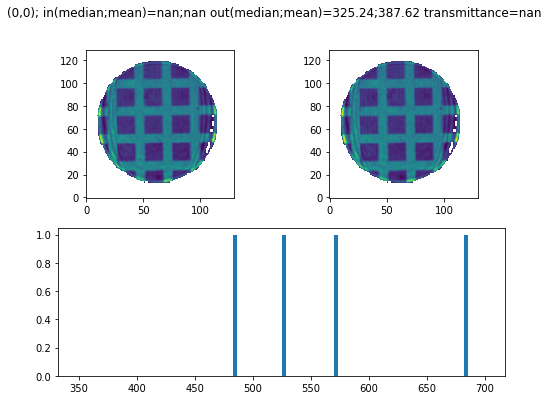

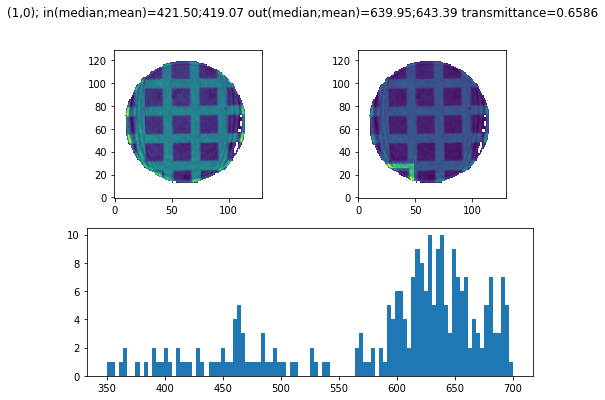

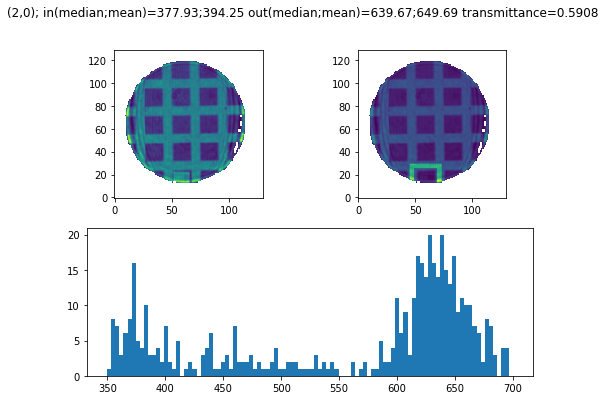

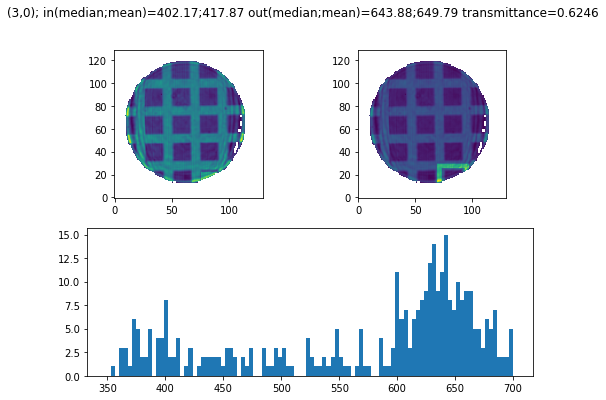

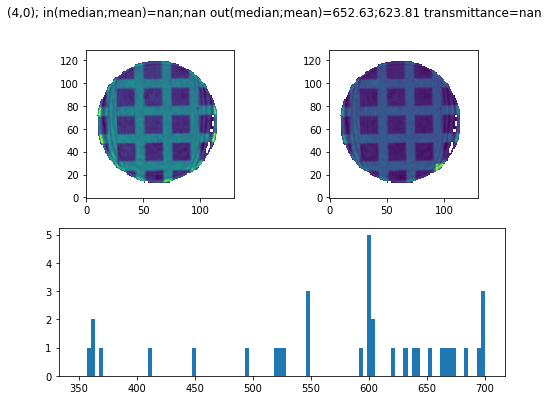

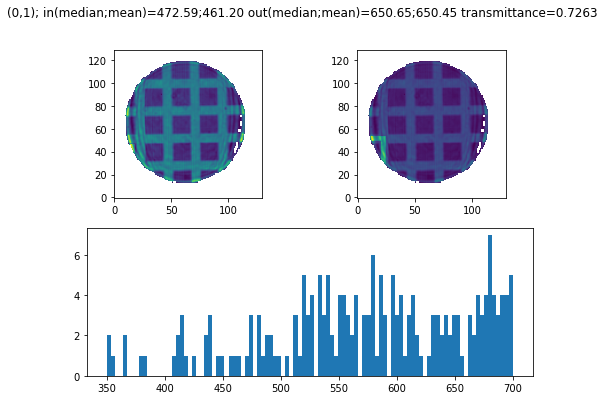

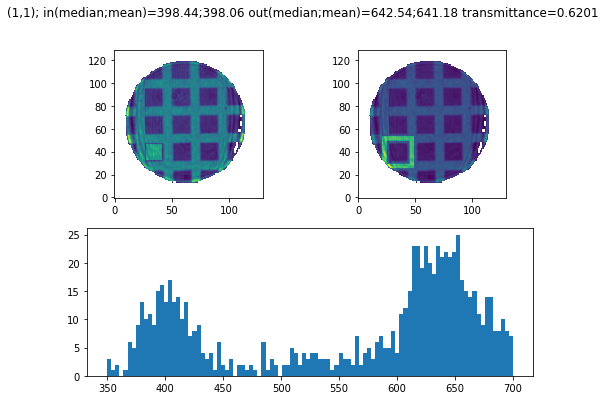

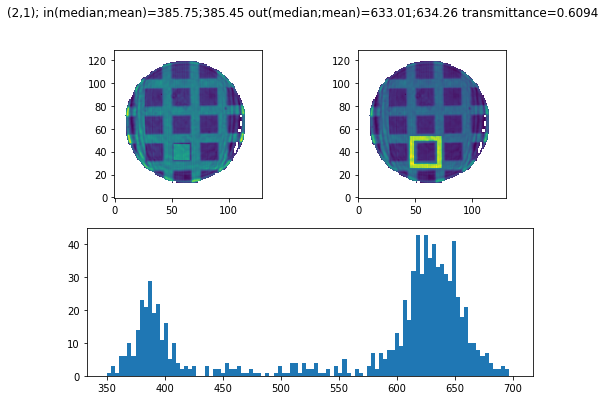

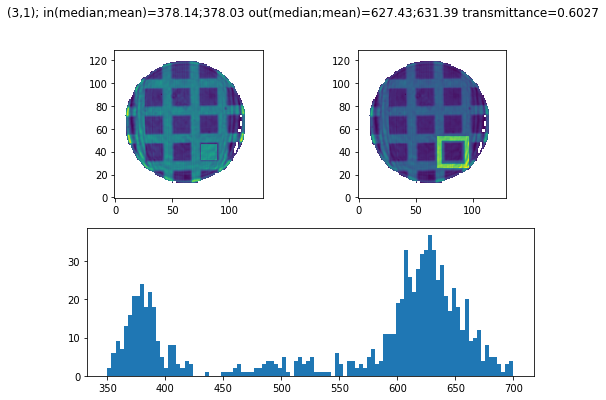

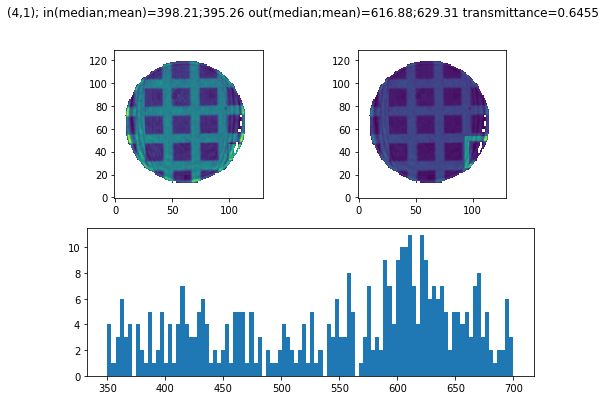

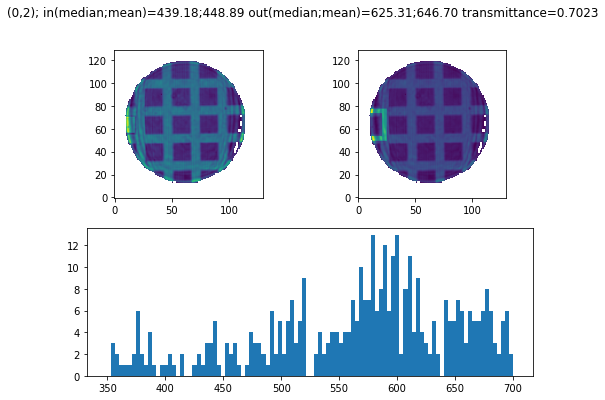

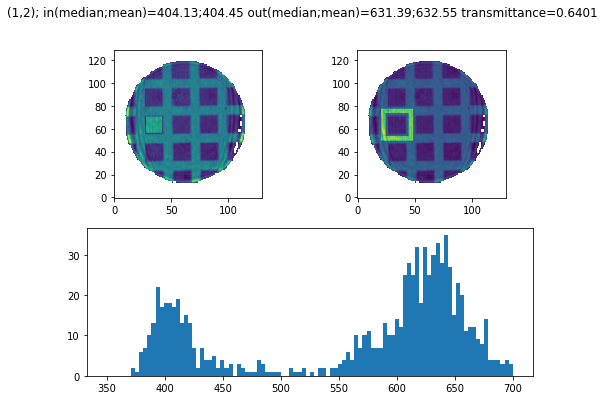

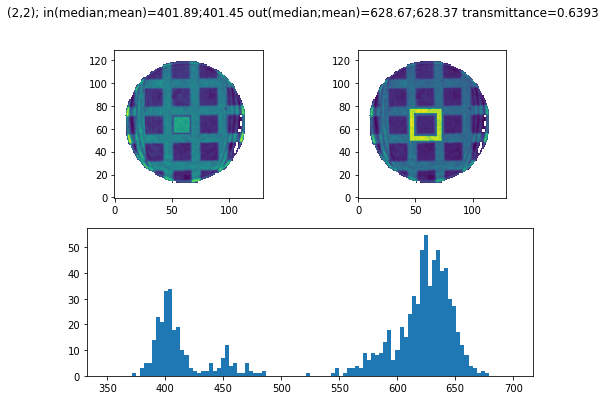

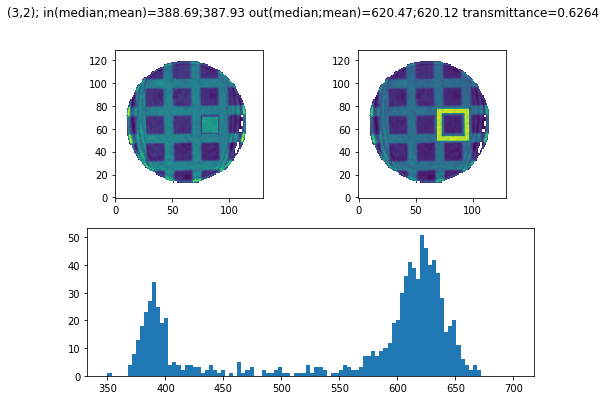

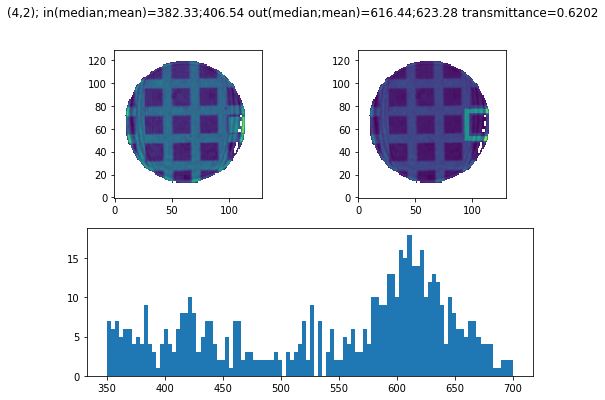

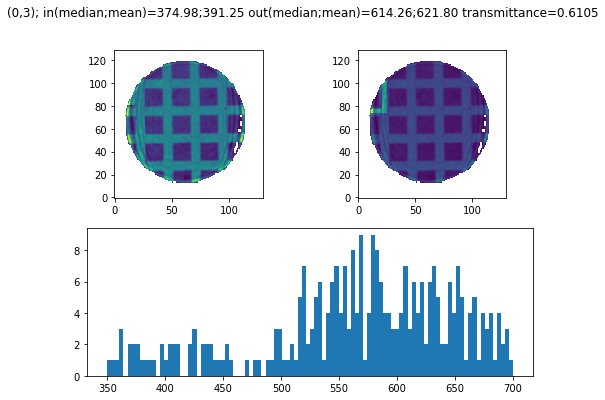

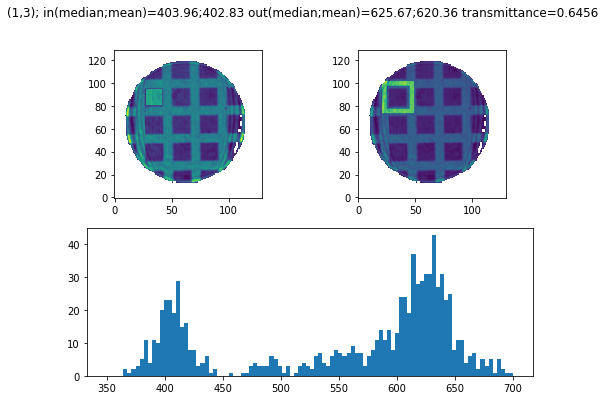

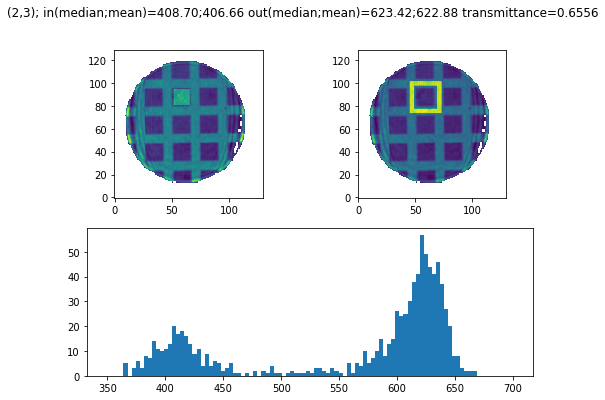

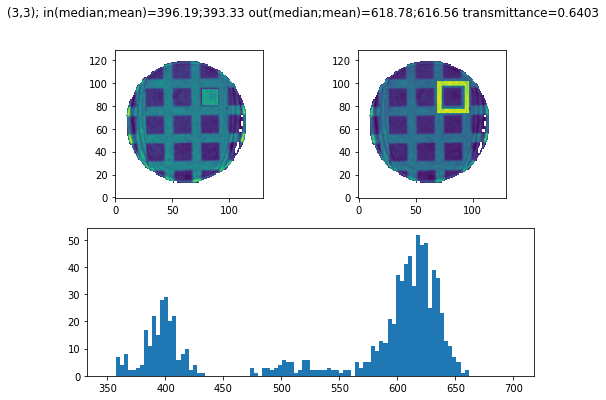

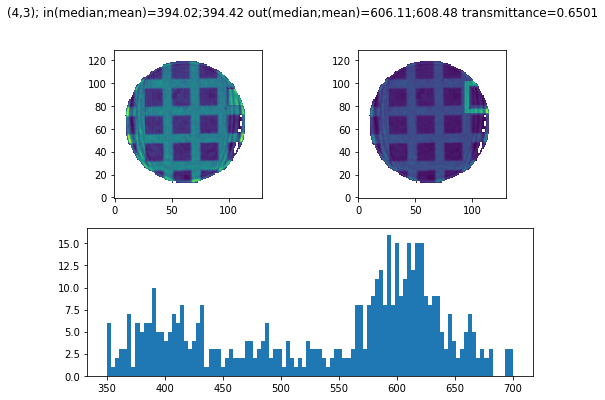

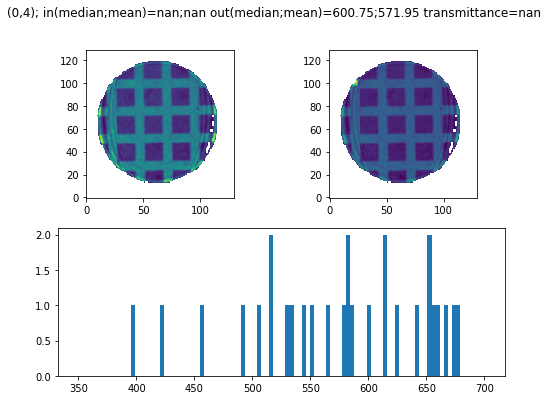

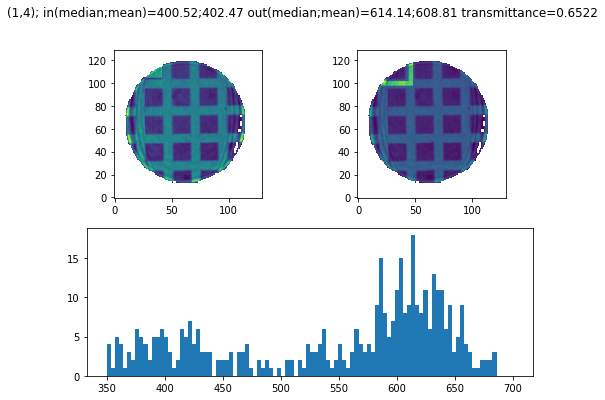

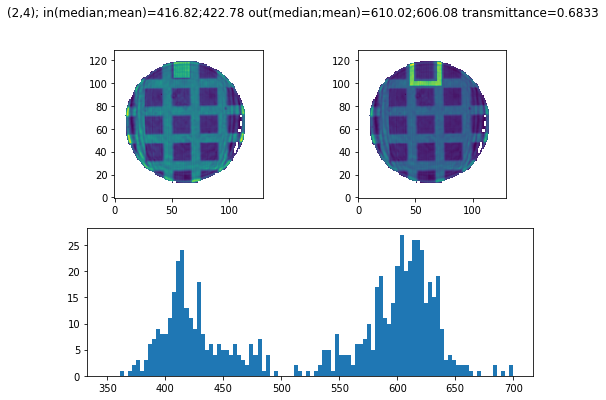

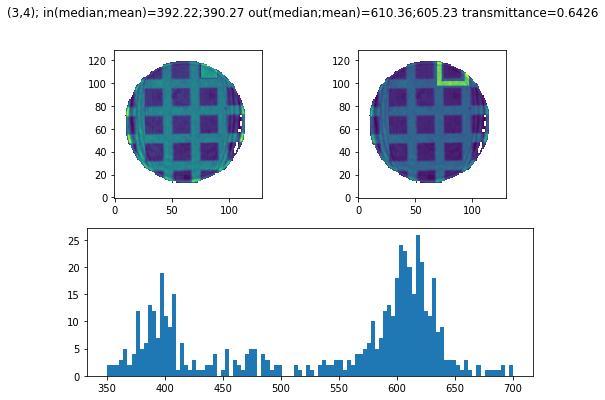

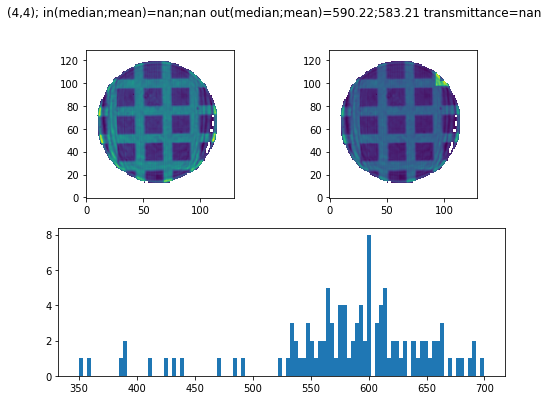

In [9]:
data = dataset[1]
Ts = np.empty((5,5))
X0s = np.arange(10.3,130,24)
Y0s = np.arange(15.5,130,24)
for j,Y0 in enumerate(Y0s):
    for i,X0 in enumerate(X0s):
        med_in, med_out, avg_in, avg_out, T = get_medians(data,X0,Y0)
        Ts[i,j] = T
        print('(%s,%s); in(median;mean)=%.2f;%.2f out(median;mean)=%.2f;%.2f transmittance=%.4f'
            %(i,j,med_in, avg_in, med_out, avg_out, T))

In [6]:
Ts

array([[       nan, 0.76964916, 0.72141038, 0.60185933,        nan],
       [0.6689257 , 0.62178717, 0.64129424, 0.64507313, 0.64509853],
       [0.59829988, 0.61150619, 0.63775263, 0.65190005, 0.67833022],
       [0.63664386, 0.60080957, 0.6240344 , 0.63820579, 0.64195802],
       [       nan, 0.65104217, 0.61199659, 0.64628007,        nan]])